In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Pahalgam_Comment_dataset_final.csv')
df.head()

,id,comment,sentiment,topic,source,post_id,user_name
0,1,I feel proud of the way the forces handled the...,positive,security,youtube,post_0001,user_0001
1,2,The government's actions in Pahalgam are comme...,positive,media,forum,post_0002,user_0002
2,3,Such bravery and discipline deserve appreciati...,positive,security,twitter,post_0003,user_0003
3,4,This has caused more fear than assurance among...,negative,media,facebook,post_0004,user_0004
4,5,The response to the Pahalgam tragedy was poorl...,negative,public_reaction,forum,post_0005,user_0005


In [3]:
df.sample(6)

,id,comment,sentiment,topic,source,post_id,user_name
1257,1258,Such bravery and discipline deserve appreciati...,positive,public_reaction,youtube,post_1258,user_1258
406,407,Authorities seemed unprepared and disorganized...,negative,media,twitter,post_0407,user_0407
3905,3906,This event could affect upcoming regional poli...,neutral,security,forum,post_3906,user_3906
620,621,This has caused more fear than assurance among...,negative,media,twitter,post_0621,user_0621
3202,3203,The government's actions in Pahalgam are comme...,positive,security,youtube,post_3203,user_3203
2395,2396,This response will boost public confidence in ...,positive,public_reaction,forum,post_2396,user_2396


In [4]:
df.shape

(4000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4000 non-null   int64 
 1   comment    4000 non-null   object
 2   sentiment  4000 non-null   object
 3   topic      4000 non-null   object
 4   source     4000 non-null   object
 5   post_id    4000 non-null   object
 6   user_name  4000 non-null   object
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [6]:
df.describe()

,id
count,4000.000000
mean,2000.500000
std,1154.844867
min,1.000000
25%,1000.750000
50%,2000.500000
75%,3000.250000
max,4000.000000


## Data Cleaning

In [7]:
df.isnull().sum()

id           0
comment      0
sentiment    0
topic        0
source       0
post_id      0
user_name    0
dtype: int64

In [8]:
df.dtypes

id            int64
comment      object
sentiment    object
topic        object
source       object
post_id      object
user_name    object
dtype: object

In [9]:
# Renamig the columns 
df = df.rename(columns={'sentiment': 'target', 'comment': 'text'})
df.sample(6)

,id,text,target,topic,source,post_id,user_name
1774,1775,The incident in Pahalgam has raised various qu...,neutral,security,twitter,post_1775,user_1775
1268,1269,The incident in Pahalgam has raised various qu...,neutral,public_reaction,twitter,post_1269,user_1269
2957,2958,The lack of planning and care is disturbing. T...,negative,media,youtube,post_2958,user_2958
53,54,Experts are still analyzing the sequence of ev...,neutral,media,youtube,post_0054,user_0054
2078,2079,This response will boost public confidence in ...,positive,media,twitter,post_2079,user_2079
1360,1361,This has caused more fear than assurance among...,negative,security,youtube,post_1361,user_1361


In [10]:
# drop last col
df = df.drop(columns=['user_name'])

In [11]:
df

,id,text,target,topic,source,post_id
0,1,I feel proud of the way the forces handled the...,positive,security,youtube,post_0001
1,2,The government's actions in Pahalgam are comme...,positive,media,forum,post_0002
2,3,Such bravery and discipline deserve appreciati...,positive,security,twitter,post_0003
3,4,This has caused more fear than assurance among...,negative,media,facebook,post_0004
4,5,The response to the Pahalgam tragedy was poorl...,negative,public_reaction,forum,post_0005
...,...,...,...,...,...,...
3995,3996,The government's actions in Pahalgam are comme...,positive,public_reaction,youtube,post_3996
3996,3997,Such bravery and discipline deserve appreciati...,positive,security,youtube,post_3997
3997,3998,This event could affect upcoming regional poli...,neutral,security,facebook,post_3998
3998,3999,This response will boost public confidence in ...,positive,media,forum,post_3999


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df.head()

,id,text,target,topic,source,post_id
0,1,I feel proud of the way the forces handled the...,positive,security,youtube,post_0001
1,2,The government's actions in Pahalgam are comme...,positive,media,forum,post_0002
2,3,Such bravery and discipline deserve appreciati...,positive,security,twitter,post_0003
3,4,This has caused more fear than assurance among...,negative,media,facebook,post_0004
4,5,The response to the Pahalgam tragedy was poorl...,negative,public_reaction,forum,post_0005


In [14]:
encoder.fit_transform(df['target'])

array([2, 2, 2, ..., 1, 2, 0])

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,id,text,target,topic,source,post_id
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005


In [17]:
## missing values
df.isnull().sum()

id         0
text       0
target     0
topic      0
source     0
post_id    0
dtype: int64

In [18]:
## check for duplicate values
df.duplicated().sum()

0

In [19]:
## remove duplicate values
# df = df.drop_duplicates(keep= 'first', inplace = True)

In [20]:
df.head()

,id,text,target,topic,source,post_id
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005


## 2. EDA

In [21]:
df['target'].value_counts()

target
2    1407
0    1300
1    1293
Name: count, dtype: int64

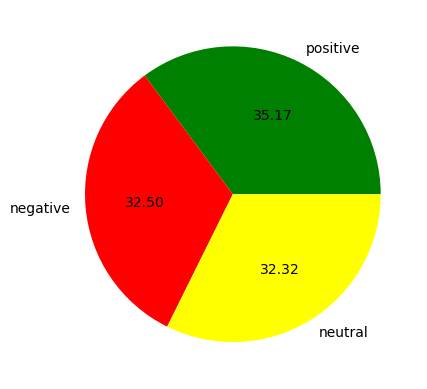

In [22]:
plt.pie(df['target'].value_counts(), labels=['positive', 'negative', 'neutral'], autopct='%0.2f', colors=['green', 'red', 'yellow'])
plt.show()

In [23]:
# Data is balanced

In [24]:
pip install nltk

In [25]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |

True

In [26]:
df.head()

,id,text,target,topic,source,post_id
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005


In [27]:
df['text'][2]

'Such bravery and discipline deserve appreciation. Such bravery and discipline deserve appreciation. I feel proud of the way the forces handled the situation.'

In [28]:
df['text'][0]

"I feel proud of the way the forces handled the situation. The government's actions in Pahalgam are commendable. The government's actions in Pahalgam are commendable. The government's actions in Pahalgam are commendable."

In [29]:
df['num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,id,text,target,topic,source,post_id,num_characters
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001,219
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002,113
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003,157
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004,106
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005,152


In [31]:
df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

0       39
1       19
2       26
3       17
4       22
        ..
3995    40
3996    21
3997    25
3998    27
3999    41
Name: text, Length: 4000, dtype: int64

In [32]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [33]:
df.head()

,id,text,target,topic,source,post_id,num_characters,num_words
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001,219,39
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002,113,19
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003,157,26
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004,106,17
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005,152,22


In [34]:
df['text'][2]

'Such bravery and discipline deserve appreciation. Such bravery and discipline deserve appreciation. I feel proud of the way the forces handled the situation.'

In [54]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,id,text,target,topic,source,post_id,num_characters,num_words,num_sentences
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001,219,39,4
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002,113,19,2
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003,157,26,3
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004,106,17,2
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005,152,22,3


In [37]:
df['text'][4]

'The response to the Pahalgam tragedy was poorly handled. Authorities seemed unprepared and disorganized. Authorities seemed unprepared and disorganized.'

In [38]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4000.000000,4000.000000,4000.000000
mean,161.179250,27.138000,3.016500
std,44.981073,8.025993,0.820607
min,89.000000,12.000000,2.000000
25%,111.000000,19.000000,2.000000
50%,161.000000,26.000000,3.000000
75%,210.000000,34.000000,4.000000
max,239.000000,48.000000,4.000000


In [39]:
## Negative
df[df['target'] == 0 ][['num_characters', 'num_words', 'num_sentences']]

,num_characters,num_words,num_sentences
3,106,17,2
4,152,22,3
5,160,30,3
8,194,34,4
15,220,37,4
...,...,...,...
3984,224,39,4
3986,149,25,3
3987,104,16,2
3990,163,27,3


In [40]:
## Negative
df[df['target'] == 0 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1300.000000,1300.000000,1300.000000
mean,157.606154,27.237692,3.042308
std,43.625641,8.050913,0.810190
min,89.000000,12.000000,2.000000
25%,115.000000,20.000000,2.000000
50%,158.000000,27.000000,3.000000
75%,199.000000,34.000000,4.000000
max,235.000000,44.000000,4.000000


In [41]:
## Neutral
df[df['target'] == 1 ][['num_characters', 'num_words', 'num_sentences']]

,num_characters,num_words,num_sentences
18,210,34,4
19,106,18,2
21,103,16,2
25,106,18,2
29,106,17,2
...,...,...,...
3974,158,26,3
3977,216,34,4
3991,106,16,2
3994,161,25,3


In [42]:
## Neutral
df[df['target'] == 1 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1293.000000,1293.000000,1293.000000
mean,159.175561,25.441609,2.994586
std,43.997706,7.048310,0.821048
min,103.000000,16.000000,2.000000
25%,106.000000,17.000000,2.000000
50%,158.000000,26.000000,3.000000
75%,210.000000,33.000000,4.000000
max,219.000000,36.000000,4.000000


In [43]:
## Positive
df[df['target'] == 2 ][['num_characters', 'num_words', 'num_sentences']]

,num_characters,num_words,num_sentences
0,219,39,4
1,113,19,2
2,157,26,3
6,223,36,4
7,113,19,2
...,...,...,...
3992,103,16,2
3993,175,34,3
3995,225,40,4
3996,149,21,3


In [44]:
df.corr(numeric_only=True)

,id,target,num_characters,num_words,num_sentences
id,1.000000,0.014899,0.001670,0.002200,-0.003357
target,0.014899,1.000000,0.080321,0.073286,-0.014365
num_characters,0.001670,0.080321,1.000000,0.960187,0.981451
num_words,0.002200,0.073286,0.960187,1.000000,0.927699
num_sentences,-0.003357,-0.014365,0.981451,0.927699,1.000000


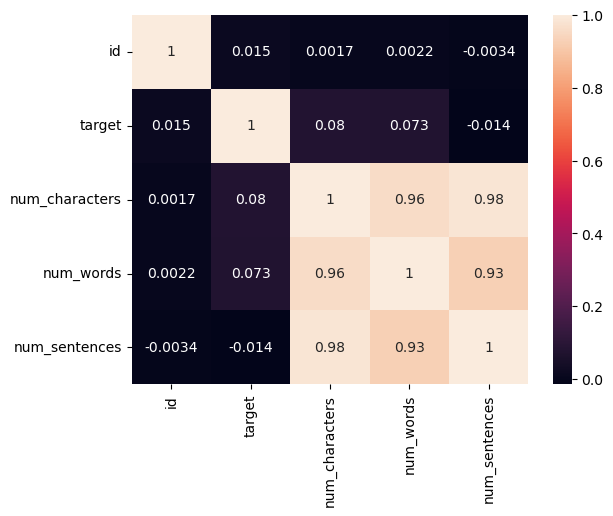

In [45]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [ ]:
# drop last col
# df = df.drop(columns=['num_sentences'])

In [56]:
df.corr(numeric_only=True)

,id,target,num_characters,num_words,num_sentences
id,1.000000,0.014899,0.001670,0.002200,-0.003357
target,0.014899,1.000000,0.080321,0.073286,-0.014365
num_characters,0.001670,0.080321,1.000000,0.960187,0.981451
num_words,0.002200,0.073286,0.960187,1.000000,0.927699
num_sentences,-0.003357,-0.014365,0.981451,0.927699,1.000000


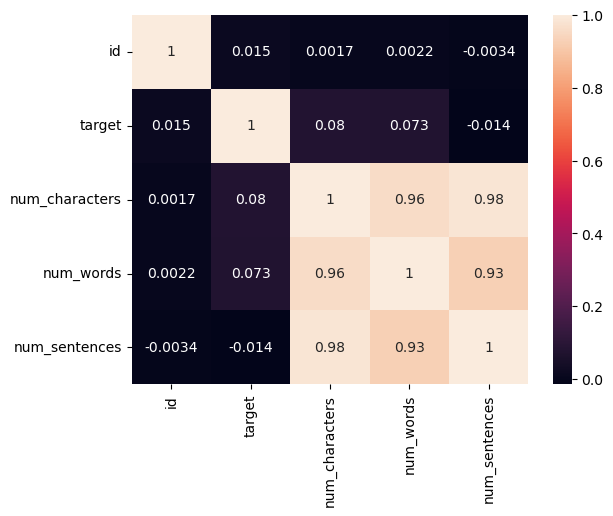

In [57]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

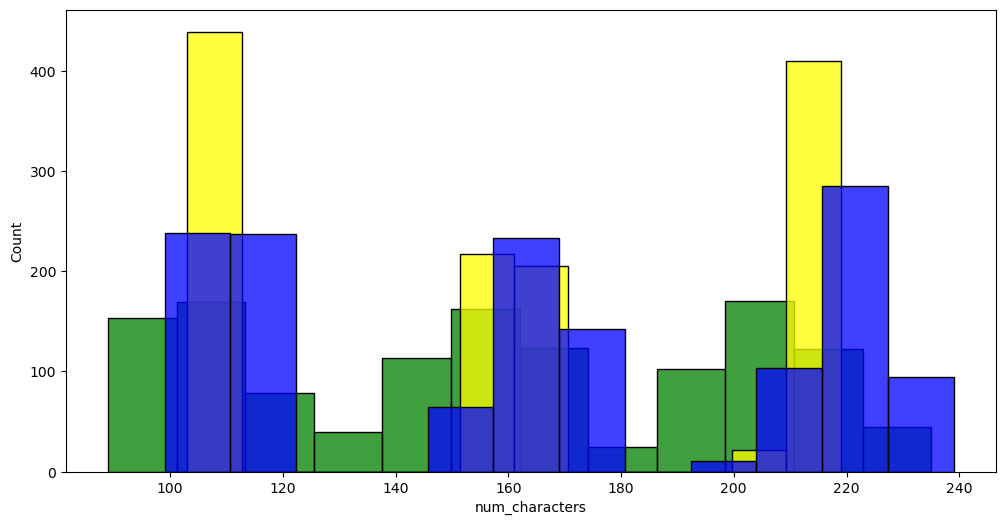

In [58]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')
sns.histplot(df[df['target']==2]['num_characters'],color='blue')
plt.show()

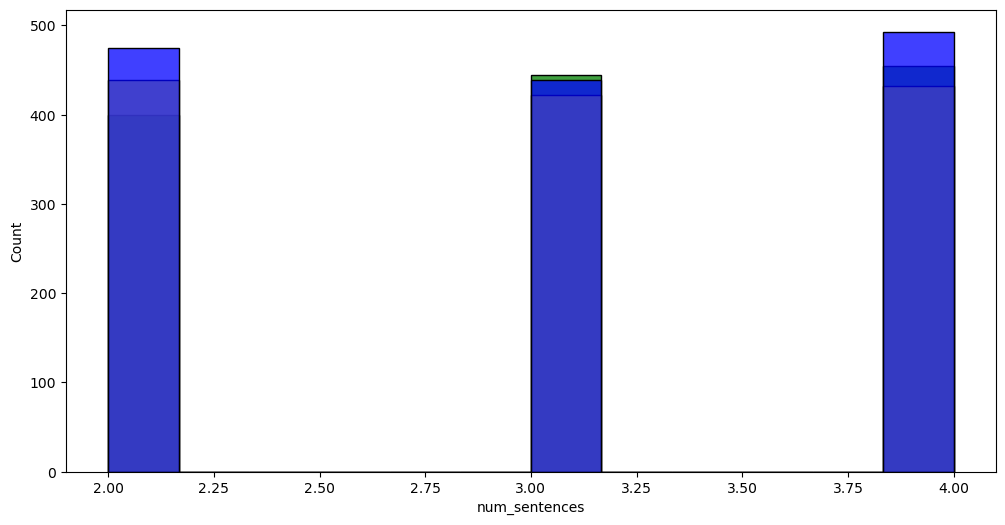

In [61]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target']==0]['num_sentences'],color='green')
sns.histplot(df[df['target']==1]['num_sentences'],color='yellow')
sns.histplot(df[df['target']==2]['num_sentences'],color='blue')
plt.show()

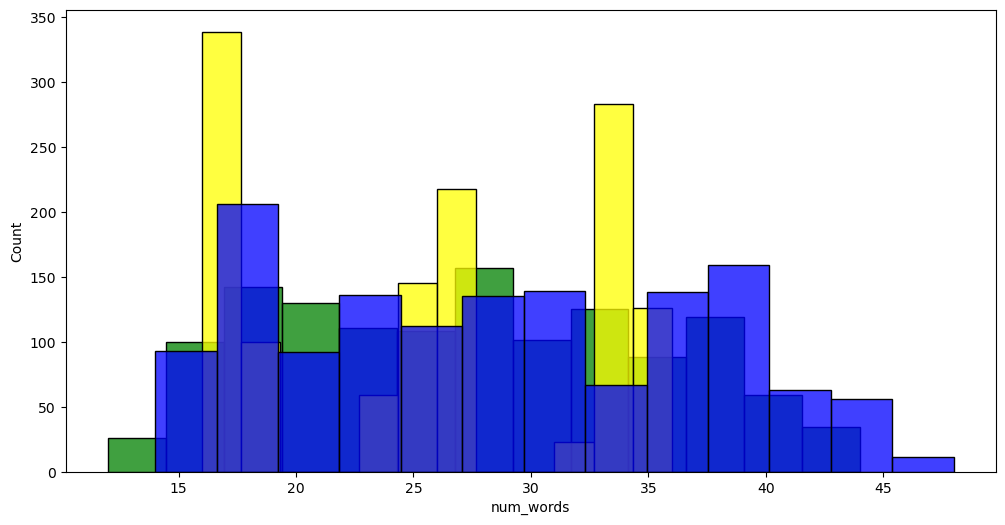

In [59]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='yellow')
sns.histplot(df[df['target']==2]['num_words'],color='blue')
plt.show()

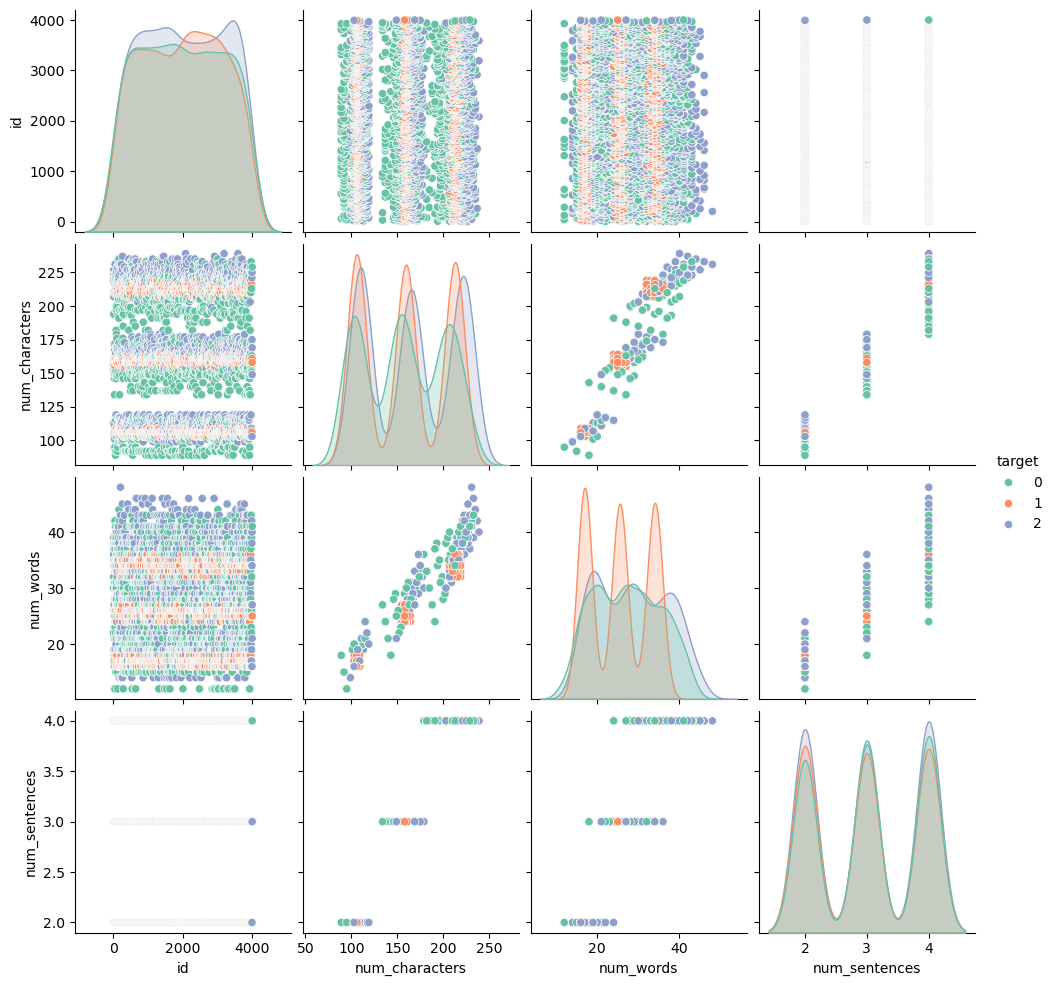

In [62]:
sns.pairplot(df, hue='target', palette='Set2')
plt.show()

## 3. Data Preprocessin
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming


In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('government')

'govern'

In [64]:
ps.stem('eats')

'eat'

In [67]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [68]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
# Intialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text =  text.lower() # Covert to lowercase
    text =  nltk.word_tokenize(text) # Tokenize the text make a list of words

    y = [] # Removing special characters
    for i in text:
        if i.isalnum():  # Keep only words (remove punctuation and special characters)
            y.append(i)

    text = y[:]  # Copy cleaned words
    y.clear()


    for i in text: # Remove stopwords and punctuation
        if i not in stopwords.words('english'): ##and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text: # Apply stemming
        y.append(ps.stem(i))

    return " ".join(y)

In [70]:
df['text'][45]

'Authorities seemed unprepared and disorganized. This has caused more fear than assurance among the public. Authorities seemed unprepared and disorganized.'

In [71]:
transform_text('Authorities seemed unprepared and disorganized. This has caused more fear than assurance among the public. Authorities seemed unprepared and disorganized.')

'author seem unprepar disorgan caus fear assur among public author seem unprepar disorgan'

In [72]:
transform_text(df['text'][4])

'respons pahalgam tragedi poorli handl author seem unprepar disorgan author seem unprepar disorgan'

In [73]:
df['text']

0       I feel proud of the way the forces handled the...
1       The government's actions in Pahalgam are comme...
2       Such bravery and discipline deserve appreciati...
3       This has caused more fear than assurance among...
4       The response to the Pahalgam tragedy was poorl...
                              ...                        
3995    The government's actions in Pahalgam are comme...
3996    Such bravery and discipline deserve appreciati...
3997    This event could affect upcoming regional poli...
3998    This response will boost public confidence in ...
3999    The response to the Pahalgam tragedy was poorl...
Name: text, Length: 4000, dtype: object

In [74]:
df['transformed_text'] = df['text'].apply(transform_text)

In [75]:
df['transformed_text']

0       feel proud way forc handl situat govern action...
1       govern action pahalgam commend respons boost p...
2       braveri disciplin deserv appreci braveri disci...
3       caus fear assur among public author seem unpre...
4       respons pahalgam tragedi poorli handl author s...
                              ...                        
3995    govern action pahalgam commend respons boost p...
3996    braveri disciplin deserv appreci braveri disci...
3997    event could affect upcom region polici incid p...
3998    respons boost public confid secur respons boos...
3999    respons pahalgam tragedi poorli handl respons ...
Name: transformed_text, Length: 4000, dtype: object

In [76]:
df.head()

,id,text,target,topic,source,post_id,num_characters,num_words,num_sentences,transformed_text
0,1,I feel proud of the way the forces handled the...,2,security,youtube,post_0001,219,39,4,feel proud way forc handl situat govern action...
1,2,The government's actions in Pahalgam are comme...,2,media,forum,post_0002,113,19,2,govern action pahalgam commend respons boost p...
2,3,Such bravery and discipline deserve appreciati...,2,security,twitter,post_0003,157,26,3,braveri disciplin deserv appreci braveri disci...
3,4,This has caused more fear than assurance among...,0,media,facebook,post_0004,106,17,2,caus fear assur among public author seem unpre...
4,5,The response to the Pahalgam tragedy was poorl...,0,public_reaction,forum,post_0005,152,22,3,respons pahalgam tragedi poorli handl author s...


In [77]:
!pip install wordcloud

In [78]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height= 500, min_font_size=10, background_color='white')

In [79]:
negative_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [80]:
df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")

'caus fear assur among public author seem unprepar disorgan respons pahalgam tragedi poorli handl author seem unprepar disorgan author seem unprepar disorgan lack plan care disturb respons pahalgam tragedi poorli handl caus fear assur among public lack plan care disturb author seem unprepar disorgan respons pahalgam tragedi poorli handl lack plan care disturb caus fear assur among public author seem unprepar disorgan respons pahalgam tragedi poorli handl respons pahalgam tragedi poorli handl caus fear assur among public author seem unprepar disorgan lack plan care disturb respons pahalgam tragedi poorli handl caus fear assur among public respons pahalgam tragedi poorli handl author seem unprepar disorgan caus fear assur among public author seem unprepar disorgan caus fear assur among public lack plan care disturb author seem unprepar disorgan author seem unprepar disorgan caus fear assur among public caus fear assur among public lack plan care disturb lack plan care disturb lack plan c

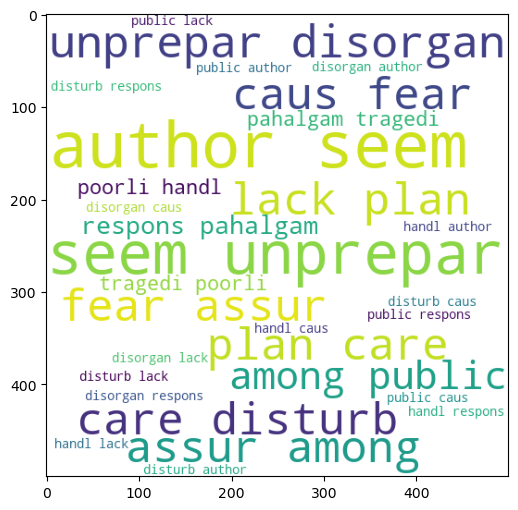

In [81]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)
plt.show()

In [82]:
df[df['target'] == 0]['transformed_text'] ## neutral sentiment

3       caus fear assur among public author seem unpre...
4       respons pahalgam tragedi poorli handl author s...
5       lack plan care disturb respons pahalgam traged...
8       lack plan care disturb author seem unprepar di...
15      caus fear assur among public author seem unpre...
                              ...                        
3984    caus fear assur among public author seem unpre...
3986    respons pahalgam tragedi poorli handl lack pla...
3987    respons pahalgam tragedi poorli handl author s...
3990    author seem unprepar disorgan respons pahalgam...
3999    respons pahalgam tragedi poorli handl respons ...
Name: transformed_text, Length: 1300, dtype: object

In [83]:
neutral_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [84]:
df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

'expert still analyz sequenc event incid pahalgam rais variou question event could affect upcom region polici event could affect upcom region polici expert still analyz sequenc event incid pahalgam rais variou question event could affect upcom region polici event could affect upcom region polici expert still analyz sequenc event incid pahalgam rais variou question multipl viewpoint emerg regard attack expert still analyz sequenc event expert still analyz sequenc event event could affect upcom region polici multipl viewpoint emerg regard attack multipl viewpoint emerg regard attack incid pahalgam rais variou question incid pahalgam rais variou question event could affect upcom region polici multipl viewpoint emerg regard attack event could affect upcom region polici event could affect upcom region polici multipl viewpoint emerg regard attack expert still analyz sequenc event incid pahalgam rais variou question expert still analyz sequenc event multipl viewpoint emerg regard attack incid

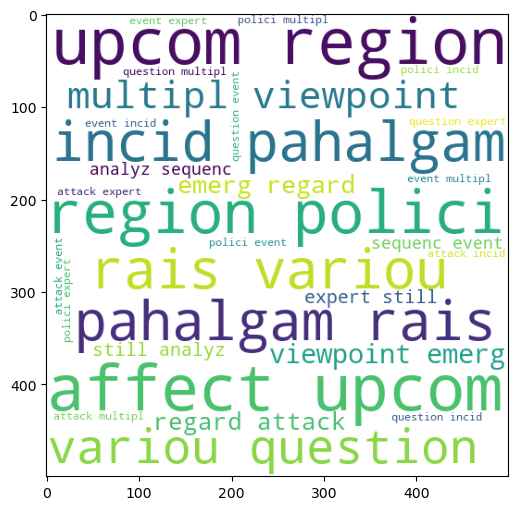

In [85]:
plt.figure(figsize=(15,6))
plt.imshow(neutral_wc)
plt.show()

In [86]:
df[df['target'] == 2]['transformed_text'] ## positive sentiment

0       feel proud way forc handl situat govern action...
1       govern action pahalgam commend respons boost p...
2       braveri disciplin deserv appreci braveri disci...
6       respons boost public confid secur braveri disc...
7       respons boost public confid secur govern actio...
                              ...                        
3992    govern action pahalgam commend braveri discipl...
3993    feel proud way forc handl situat feel proud wa...
3995    govern action pahalgam commend respons boost p...
3996    braveri disciplin deserv appreci braveri disci...
3998    respons boost public confid secur respons boos...
Name: transformed_text, Length: 1407, dtype: object

In [87]:
positive_wc = wc.generate(df[df['target'] == 2]['transformed_text'].str.cat(sep=" "))

In [88]:
df[df['target'] == 2]['transformed_text'].str.cat(sep=" ")

'feel proud way forc handl situat govern action pahalgam commend govern action pahalgam commend govern action pahalgam commend govern action pahalgam commend respons boost public confid secur braveri disciplin deserv appreci braveri disciplin deserv appreci feel proud way forc handl situat respons boost public confid secur braveri disciplin deserv appreci govern action pahalgam commend respons boost public confid secur respons boost public confid secur govern action pahalgam commend braveri disciplin deserv appreci govern action pahalgam commend govern action pahalgam commend braveri disciplin deserv appreci braveri disciplin deserv appreci respons boost public confid secur feel proud way forc handl situat respons boost public confid secur respons boost public confid secur braveri disciplin deserv appreci govern action pahalgam commend feel proud way forc handl situat govern action pahalgam commend govern action pahalgam commend govern action pahalgam commend braveri disciplin deserv a

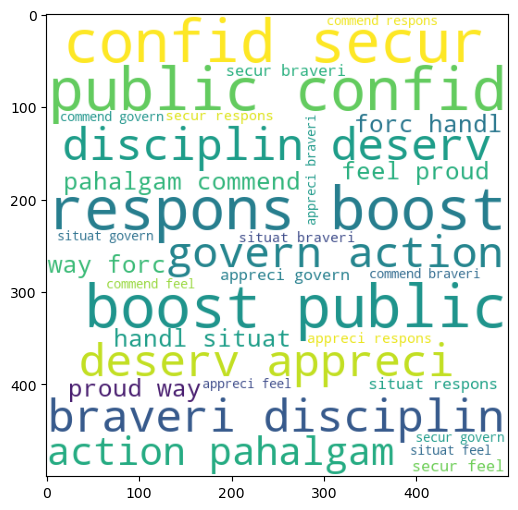

In [89]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)
plt.show()

## 4. Model Building

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)


In [97]:
df['transformed_text']

0       feel proud way forc handl situat govern action...
1       govern action pahalgam commend respons boost p...
2       braveri disciplin deserv appreci braveri disci...
3       caus fear assur among public author seem unpre...
4       respons pahalgam tragedi poorli handl author s...
                              ...                        
3995    govern action pahalgam commend respons boost p...
3996    braveri disciplin deserv appreci braveri disci...
3997    event could affect upcom region polici incid p...
3998    respons boost public confid secur respons boos...
3999    respons pahalgam tragedi poorli handl respons ...
Name: transformed_text, Length: 4000, dtype: object

In [98]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
X

array([[0.50137836, 0.        , 0.        , ..., 0.        , 0.        ,
        0.16648044],
       [0.36853696, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.21676899],
       ...,
       [0.        , 0.38109255, 0.        , ..., 0.19562199, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16773204, ..., 0.        , 0.        ,
        0.        ]])

In [100]:
X.shape

(4000, 52)

In [101]:
print(df.columns.tolist())

['id', 'text', 'target', 'topic', 'source', 'post_id', 'num_characters', 'num_words', 'num_sentences', 'transformed_text']


In [102]:
df['target'].values

array([2, 2, 2, ..., 1, 2, 0])

In [103]:
y = df['target'].values

In [104]:
y

array([2, 2, 2, ..., 1, 2, 0])

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [107]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

MultinomialNB Accuracy: 1.0


In [108]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

GaussianNB Accuracy: 1.0


In [110]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))


BernoulliNB Accuracy: 1.0


In [112]:
from sklearn.metrics import confusion_matrix

print("Multinomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Gaussian Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Bernoulli Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))


Multinomial Confusion Matrix:
 [[241   0   0]
 [  0 242   0]
 [  0   0 317]]
Gaussian Confusion Matrix:
 [[241   0   0]
 [  0 242   0]
 [  0   0 317]]
Bernoulli Confusion Matrix:
 [[241   0   0]
 [  0 242   0]
 [  0   0 317]]


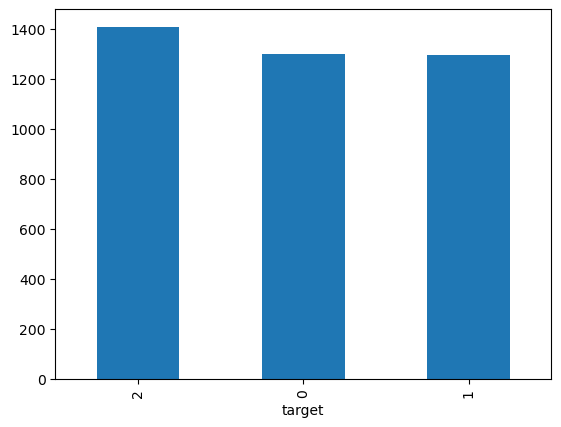

In [113]:
df['target'].value_counts().plot(kind='bar')
plt.show()